# Market segmentation

## Introduction

Customer segmentation is the process of dividing customers into groups or clusters of shared characteristics. They can be segmented using demographic characteristics such as age, gender and  marital status or phychograpphic attributes such lifestyle, social class and personality or behavioral characteristics terics such as spending and consumption habits

K-means clustering algorithm is one of the well-known algorithms for clustering data.This is also called flat clustering. 

## Need for segmentation

It will help in identifying the most potential customers.

It help marketers to better target customers with specific ads with regard to those xferistics common to them

It improves customr experience

## Business goal

I hope to to gain a deeper understanding of our cutomers preferences and to discover what each sub group or cluster finds most valuable to them. Kmeans clustering algorithm is the machine learning algorithm used  to perform  the segmentation. 

## Data source

Dataset is publicly available on kaggle and you can find it in my github repository too

Dataset link: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

## Proposed method
I will be using Clustering. The algorithm is KMean Algorithm
### K-Means algorithm
K-means clustering algorithm is one of the well-known algorithms for clustering.
Kmeans algorithm is an iterative algorithm that tries to partition the dataset into Kpre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. It tries to make the intra-cluster data points as similar as possible while also keeping the clusters as different (far) as possible

In [1]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans

In [2]:
# Reading the dataset
customers = pd.read_csv("Mall_Customers.csv")

In [3]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Here we have the following features :

CustomerID: It is the unique ID given to a customer
    
Gender: Gender of the customer
    
Age: The age of the customer
    
Annual Income(k$): It is the annual income of the customer
    
Spending Score: It is the score(out of 100) given to a customer by the mall authorities, based on the money spent and the behavior of the customer.

In [4]:
customers.shape

(200, 5)

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
customers.isnull().sum() #check for missing values

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

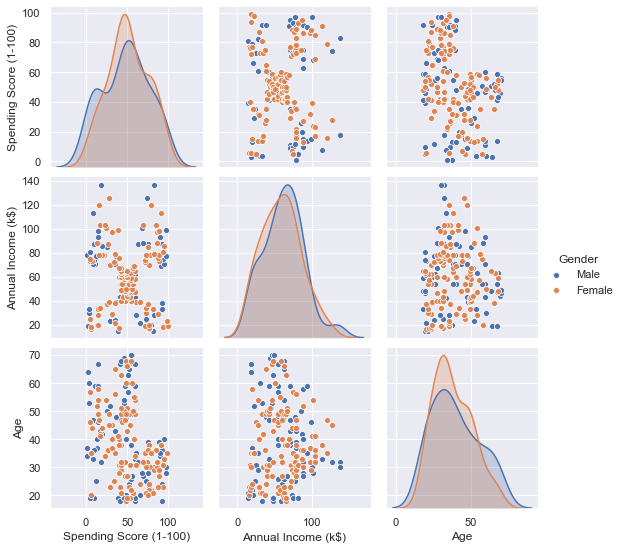

In [8]:
sns.pairplot(customers, vars = ['Spending Score (1-100)', 'Annual Income (k$)', 'Age'], hue = "Gender")

The pairplot plot a pairwise relationships. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column. 

## Clustering

it is a type of unsupervised learning method and a common technique for statistical data analysis used in many fields. Clustering mainly is a task of dividing the set of observations into subsets, called clusters, in such a way that observations in the same cluster are similar in one sense and they are dissimilar to the observations in other clusters. In simple words, we can say that the main goal of clustering is to group the data on the basis of similarity and dissimilarity.

## KMean Clustering
K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. The results of the K-means clustering algorithm are:

The centroids of the K clusters, which can be used to label new data

Labels for the training data (each data point is assigned to a single cluster)

## 2D clustering based on Age and Spending score

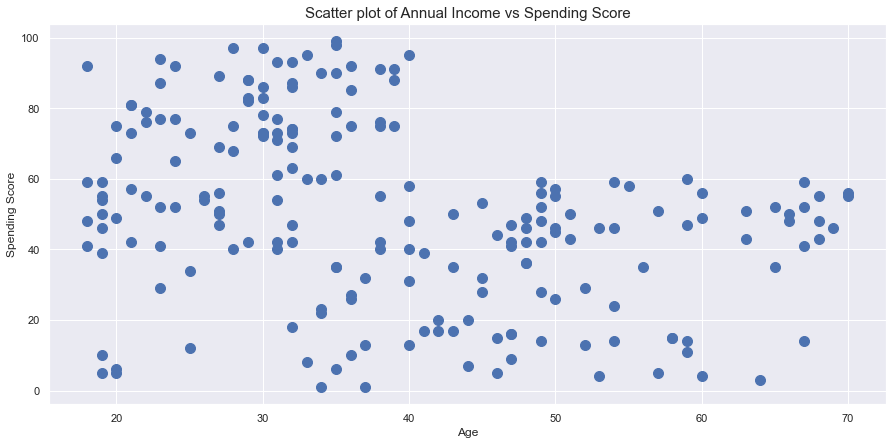

In [9]:
# Scatterplot
plt.figure(1 , figsize = (15 , 7))
plt.title('Scatter plot of Annual Income vs Spending Score', fontsize = 15)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.scatter( x = 'Age', y = 'Spending Score (1-100)', data = customers, s=100)
plt.show()

## Determining the number of clusters k
### Elbow method
The Elbow method is a method of interpretation and validation of consistency within-cluster analysis designed to help find the appropriate number of clusters in a dataset.

In [10]:
X = customers[['Age' , 'Spending Score (1-100)']].iloc[: , :].values

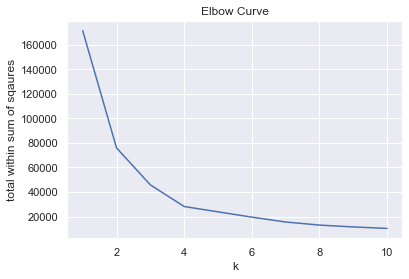

In [11]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=200,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.xlabel('k')
plt.ylabel('total within sum of sqaures')
plt.title('Elbow Curve')
plt.show() 

## The plot looks like an arm with a clear elbow at k = 4

In [12]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [13]:
#  cluster Centers
f1=kmeans.cluster_centers_
f1

array([[27.61702128, 49.14893617],
       [30.1754386 , 82.35087719],
       [55.70833333, 48.22916667],
       [43.29166667, 15.02083333]])

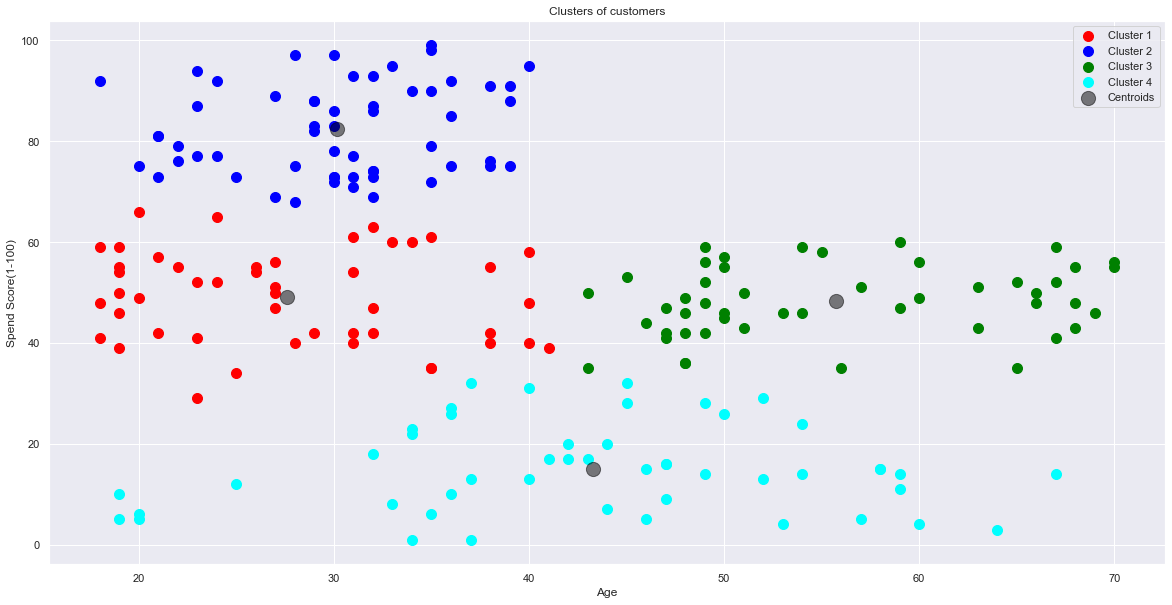

In [14]:
plt.figure(1, figsize=(20, 10))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5, label= 'Centroids');
plt.ylabel('Spend Score(1-100)'), plt.xlabel('Age')
plt.title('Clusters of customers')
plt.legend()
plt.show()

## Analyzing the result

In cluster 2  we can see young customers( somwhere between 18 to 41) with a high spending score. This is the ideal case for the mall. These are people who are satisfy with the services and items being sold in the Mall

In cluster 3 we can see old people with a moderate spending score. This is okay since old people turn to spend less compared to younger people

In cluster 4 we have people of almost all the ages majority between 30 to 60 with  low spending scores. Maybe these are the people who are unsatisfied or unhappy with the mall’s services. These can be the prime targets of the mall, as they have the potential to spend money. So, the mall authorities will try to add new facilities so that they can attract these people and can meet their needs.

In cluster 1 we can see younger people who spend moderately. This group can still be targetted with more advert emails and messages abouth items they love  to attract them to our mall


## 2D Clustering based on Annual Income and Spending Score

In [15]:
X1 = customers[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values

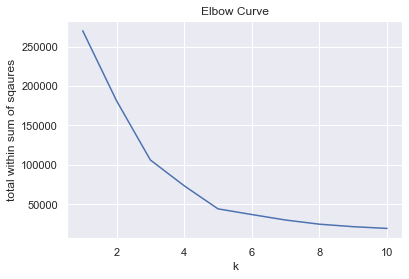

In [16]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=200,n_init=10,random_state=0)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.xlabel('k')
plt.ylabel('total within sum of sqaures')
plt.title('Elbow Curve')
plt.show() 

## The plot looks like an arm with a clear elbow at k = 5

In [17]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X1)
y_kmeans = kmeans.predict(X1)

In [18]:
# cluster centers
f2=kmeans.cluster_centers_
f2

array([[26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571]])

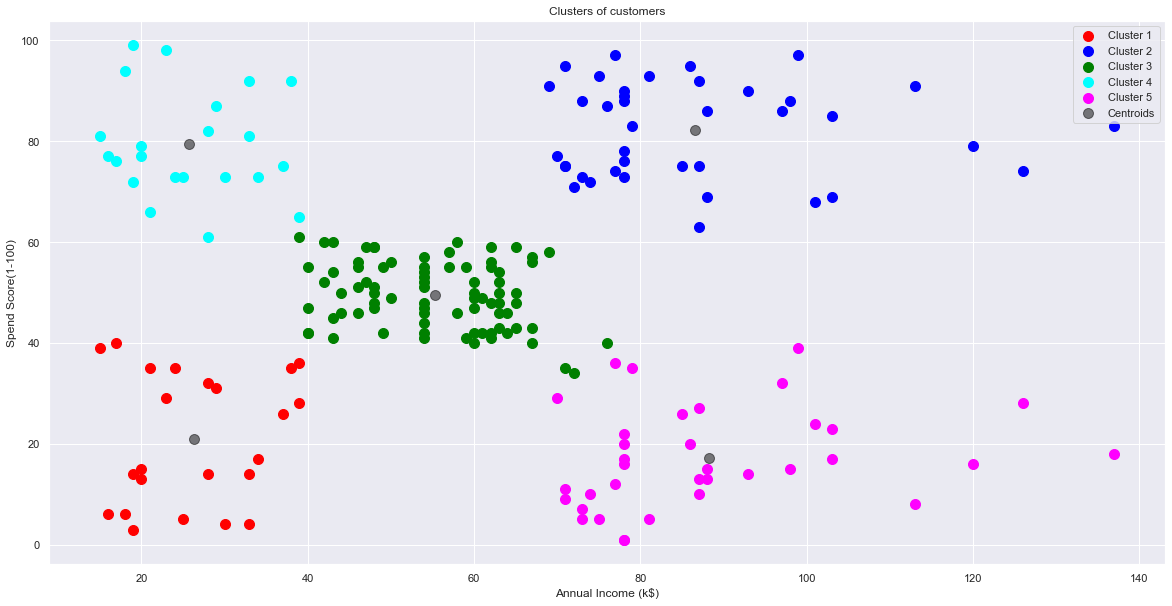

In [19]:
plt.figure(1, figsize=(20, 10))
plt.scatter(X1[y_kmeans == 0, 0], X1[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X1[y_kmeans == 1, 0], X1[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X1[y_kmeans == 2, 0], X1[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X1[y_kmeans == 3, 0], X1[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X1[y_kmeans == 4, 0], X1[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5, label = 'Centroids');
plt.ylabel('Spend Score(1-100)'), plt.xlabel('Annual Income (k$)')
plt.title('Clusters of customers')
plt.legend()
plt.show()

The mall customers are grouped into five different clusters based on annual income and spending score

For cluster 1 we can see people with low annual income and low spending scores, this is quite reasonable as people having low salaries prefer to buy less, in fact, these are the wise people who know how to spend and save money. The shops/mall will be least interested in people belonging to this cluster.

For cluster 4 we can see that people have low income but higher spending scores, these are those people who for some reason love to buy products more often even though they have a low income. Maybe it’s because these people are more than satisfied with the mall services. The shops/malls might not target these people that effectively but still will not lose them.

In cluster 3, customers  have average income and an average spending score, these people again will not be the prime targets of the shops or mall, but again they will be considered and targetted moderately and other data analysis techniques may be used to increase their spending score.

In cluster 2 we see that the customers have high income and high spending scores, this is the ideal case for the mall or shops as these people are the prime sources of profit. These people might be the regular customers of the business and are convinced by the business facilities.

In cluster 5 we see that the customers have high income but low spending scores, this is interesting. Maybe these are the people who are unsatisfied or unhappy by the mall’s services. These people should be the prime targets of the mall, as they have the potential to spend money. So, the marketer will try to add new facilities and send them regular text ads via email or message so that they can attract these people and can meet their needs.

## 3D Clustering Age , Annual Income and Spending Score

In [20]:
X2 = customers[['Age', 'Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values

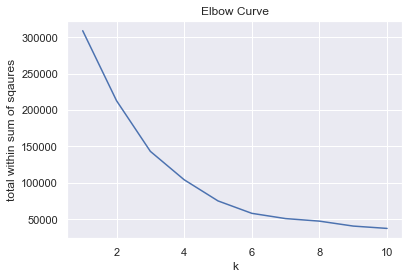

In [21]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=200,n_init=10,random_state=0)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.xlabel('k')
plt.ylabel('total within sum of sqaures')
plt.title('Elbow Curve')
plt.show() 

## The plot looks like an arm with a clear elbow at k = 6

In [22]:
kmeans3=KMeans(n_clusters = 6).fit(X2)
y_pred3=kmeans3.fit_predict(X2)

In [23]:
# cluster centers
f3=kmeans3.cluster_centers_
f3

array([[27.        , 56.65789474, 49.13157895],
       [25.27272727, 25.72727273, 79.36363636],
       [56.15555556, 53.37777778, 49.08888889],
       [41.68571429, 88.22857143, 17.28571429],
       [32.69230769, 86.53846154, 82.12820513],
       [44.14285714, 25.14285714, 19.52380952]])

Text(0.5, 0, 'Score')

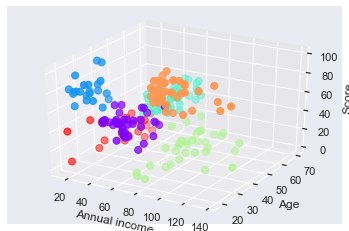

In [24]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')


# Data for three-dimensional scattered points
zdata = X2[:,2]
xdata = X2[:,1]
ydata = X2[:,0]
ax.scatter3D(xdata, ydata, zdata, c=y_pred3, cmap='rainbow', s=50);


ax.set_xlabel("Annual income")
ax.set_ylabel("Age")
ax.set_zlabel("Score")

## Benfits of this project customer segmentation

Companies are able to target specific groups of customers, a customer segmentation model allows for the effective allocation of marketing resources and the maximization of cross- and up-selling opportunities.

Group of customers are easily targettted with personalized messages as part of a marketing mix that is designed around their needs, it's easier for companies to send those customers special offers meant to encourage them to buy more

## Conclusion
I have analysed Customer data and performed 2D and 3D clustering using K Means Algorithm. This kind of cluster analysis helps design better customer acquisition strategies and helps in business growth.